# Welcome!!
This notebook aims to teach the very beginners about **complex visualizations of data with the Pythonic eyes**. This tutorial aims only at the visualiation and to **demonstrate that how can you build and customize different types of graphs** but not the insights and theory of graphs and Results but I'll still try my best to tell you that what a specific graph is trying to tell you and where you should use it. I'll be demonstrating:
1. How to Plot 
2. How to plot using your own customization
3. How to plot beautifully
4. What can you plot and why are these plots used
5. Plot within a plot. Yayy!!! I'm Subplot

**Please Read the markups and comments carefully as they tell you interesting thing very insightfully and `Please do not get intimidated by the lines of codes because they are all extra things to customize your plots` as a plot needs just one line of code as simple as `plt.plot([1,2,3,4,5])`.**

When you feel uncomfortable or stucj somewhere, use the documentation about that method and read what are the parameters and how each parameter is doing their things. 

In case you are unable to understand or have some specific question or customization, trust me, collective intelligence over `stackoverflow` can beat each and every tutorial out there.

# Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats # to plot normal distribution
import matplotlib.pyplot as plt # this is basically matplotlib as we know it
import seaborn as sns 
# seaborn is a wrapper library which uses matplotlib under the hood to make graphs more beautiful
from pylab import rcParams # to change the parameters globally

# Helpers


In [2]:
SEED = 13
np.random.seed(SEED) # so that you can re create exactly whats in Notebook

rcParams['figure.figsize'] = 7,4
plt.style.use('seaborn')

def get_cmap(n, name='hsv',return_cmap=True):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.
    Can throw error if number of colors exceeds the limit of cmap'''
    cmap = plt.cm.get_cmap(name, n)
    if return_cmap:
        return cmap 
    else:
        return cmap.colors

# Import Data
Import somerandom data to use as dummy data. We are just trying to learn how can we plot not that what kind of data we want to use. This data sets has both the numerical and categorical data so it is best kind kind of data to learn visualization form.

In [3]:
df = pd.read_csv('/kaggle/input/pokemon/Pokemon.csv')
df.drop('#',axis=1,inplace=True) # there is this '#' column which is nothing but index
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# Important Note
Before we start, there are some things that you should remember
1. Not all plots are same. Some are suitable for Numerical while others are for Categorical
2. There are default settings which apply for all the plots and you can change
3. Subplots are plots within plots are used widely and have **almost** have same functions as `plt` module.
4. matplotlib accepts both numpy as well as pandas dataframes and series

# Common Functionality
A matplotlib object is basically a figure with some specified dimensions and you can have a single figure in it, multiple subplots or **If you plot different plots within a same figure, you'll have overlapped instances within that figure** 

For Every plot, there are some common Functionalities such as:
1. Figure: `fig = plt.figure(figsize=(5,5)` gives us the figure of size (5,5) for current cell. A new figure is initialized with default dimensions each time a plt object is called in a new cell. We do not usually need this unless we want to change the size of figure.
2. Title: `plt.title('Here goes the Title)` tells us about that what the figure is all about and what does it show
3. X Label: `plt.xlabel('Meaning of X axis')` tells us about the what X-axis in our figure is representing
4. Y Label: `plt.ylabel('Meaning of Y Axis')`  tells us about the what X-axis in our figure is representing
5. X,Y Ticks: `plt.xticks()`, `plt.yticks()` Change the color of ticks on x,Y axis, their padding, rotation etc etc
6. Legend: `plt.legend()` when there are more than 2 lines in the same plot than the legend defines which color line reprsents which property.
7. Show/Save: `plt.show()`, `plt.savefig()` shows or saves the figure
8. Colors: Colors in matplotlib can be used using different values such as `(0,1,0)`, `'g'`, `'green` and `#00ff00` all for green color.
9. Multicolor: In casethere are multiple plots such as bars, lines etc in same plot, matplotlib generates colors on its own but if you want to give custom colors, you an use the  colormap `plt.cm` or give a custom list of lists of RGB values 1 for each entity.
10. Size: Size parameter is almost same where we need to print a string or some comment and size can be a string as 'large' or some integer such as 12.

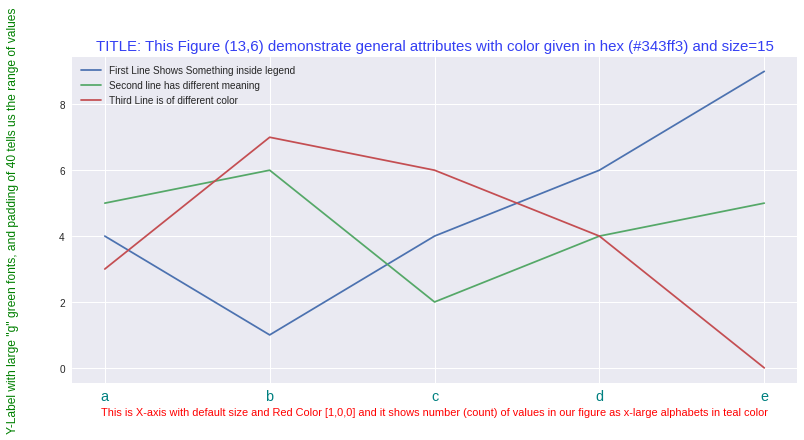

In [4]:
figure = plt.figure(figsize=(13,6))

plt.title('TITLE: This Figure (13,6) demonstrate general attributes with color given in hex (#343ff3) and size=15',color='#343ff3',size=15)

plot1 = plt.plot([4,1,4,6,9],label='First Line Shows Something inside legend')
plot2 = plt.plot([5,6,2,4,5], label='Second line has different meaning')
plot3 = plt.plot([3,7,6,4,0],label='Third Line is of different color')

plt.xlabel('This is X-axis with default size and Red Color [1,0,0] and it shows number (count) of values in our figure as x-large alphabets in teal color'
           ,color=[1,0,0])

plt.ylabel('Y-Label with large "g" green fonts, and padding of 40 tells us the range of values',
           color='g',labelpad=40, size='large')

plt.xticks([0,1,2,3,4],['a','b','c','d','e'],color='teal',size='x-large')

plt.legend(loc='best') # you can do a lot more with legend
# plt.grid() # show a grid in background to show major, minor or both lines and whether for x, y or both axis
# with seaborn style grid is true automatically
plt.show()

# Subplots
Almost all of the people tend to cover this as the last part and they tend to do it differently as there are more than 1 methods for plotting the subplots. TBH, it confused me a lot and I chose 1 solution for it all for subplots using the Functional methods. What I am going to do below will be very helpful for you in generating the dynamic subplots on the go. It just works like the `plt.something()` except the naming.
1. Creation: You can create subplots by `figure,axes = plt.subplots(nrows=2,ncols=2,figsize(15,7)` which will create a Father Figure of width 15 and height 7. Inside this, there will be 4 evenly spaced subplots. `axes` is a numpy array which contains the 4 different axes. You can access then as `axes[i][j]`.
2. Flatten: Best way to use the axes object is to `ravel()` of `flatten()` so that you can index using only 1 integer instead of 2.
3. Accessing: You can simply access the subplots just using `axes[i].plot()`.
4. Editing: Almost all of the methods you saw above are accessible in subplots too such as `ax[i].set_ylabel()` or `ax[i].set_title()`. You can refer to documentation anytime to check the related methods.
5. Merging: You can merge 2 subplots either as column or row wise, share Y,X or both axes, or customize on yorr own using different methods available.
6. Deletion: You can delete a specific subplot by using `figure.delaxes(ax[i])`.

<font color='red'>Spacing of Subplots is basically dependent on the ratio of the Figure's Height and Width. A jupyter notebook can display a maximum width of 15 but graphs can interactive too so that you could zoom in on a specific part (beyong the scope of this notebook). You can always change the spacing by changing the default parameters for spacing which are </font> `plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)`. `wspace` and `hspace` are relative width and height spaces for the subplots with respect to the total width and height. You can also use `plt.tight_layout()` to auto adjust the subplots so that no 2 subplots touch each other.

**We'll be Looking at the subplots in the coming sections**

# Univariate Graphs
These Graphs can be seen as the Analysis of one Variable only. Such as Type 1 analysis using Bar,Pie etc or HP Analysis Using Line or Histogram etc. We'll be further dividing those into 2 Categories as Numerical and Categorical.
## <font color='teal'>Numerical Plots </font>
These are the plots to show something with the numerical data which are in the range -infinity to +infinity. 
### <font color='magenta'> Line Plot</font>
Used in finding the pattern among the given points <font color='green'>Specially used in Time Series Data</font>

It plots a line between given 2-D points and if the data is 1-D, it taken the `range(len(data))` as the second axis. You can put a `maker`, change `linestyle`, change `markersize`, change `linewidth` etc. We'll be looking at a few different things now.

<font color='red'>**Please think this of as a Univeriate Analysis. We are Not comparing anything as of now just want to tell you how the Line Plot Works and how can you do multiple things with a single Line Plot**</font>

In [5]:
stocks = pd.read_csv('/kaggle/input/national-stock-exchange-time-series/infy_stock.csv',index_col='Date')
stocks.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


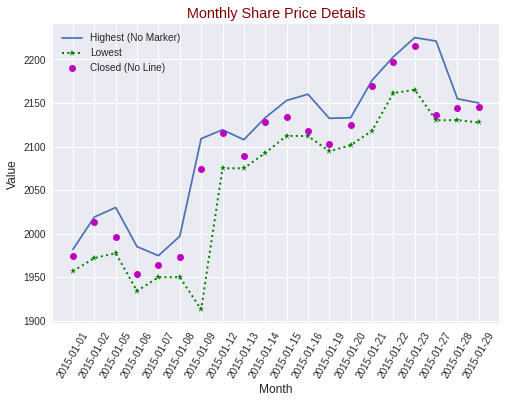

In [6]:
# Default Figure Size

sample_stock = stocks.iloc[:20,:] # First 20 months stocks Prices details only to show clearly

plt.plot(sample_stock['High'],label='Highest (No Marker)') # default attributes
plt.plot(sample_stock['Low'],label='Lowest',ls='dotted',color='green',lw=2,marker='*') 
plt.plot(sample_stock['Close'],label='Closed (No Line)',linestyle='none',marker='o',color='m',markersize=7)

plt.xlabel('Month',size='large')
plt.ylabel('Value',size='large')
plt.xticks(rotation=60)
plt.title('Monthly Share Price Details',size='x-large',color='maroon')

plt.legend()
plt.show()

### <font color='magenta'>Histogram, Density and Probability Plots</font>
Histogram shows you the PDF or Probability Density Function of a distribution. It is useful in seeing what kind of data we are looking at. Is it skewed,linear,bimodal or perfect bell shaped. It also tells about the outliers and mode of the distribution. <font color='teal'> Histogram shape is highly dependent on the number of bins </font>

**We'll be looking at the Histogram of a distribution using subplots**

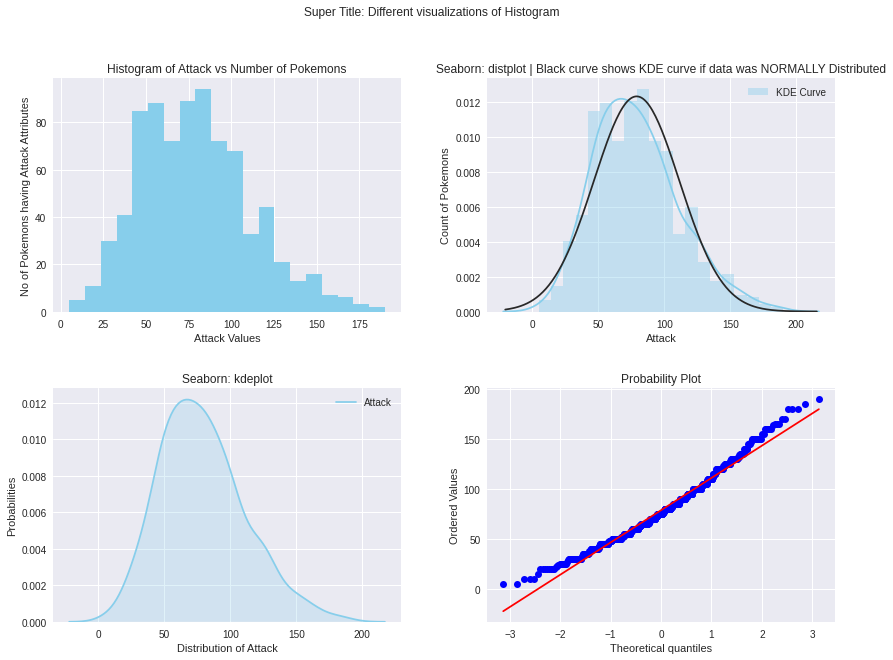

In [7]:
# you can do all of the things using plt.hist() too
f,ax = plt.subplots(2,2,figsize=(14,10)) # generate 4 subplots
ax = ax.ravel()
f.suptitle('Super Title: Different visualizations of Histogram')

# matplotlib's histogram
n,bins,patches = ax[0].hist(df['Attack'],bins=20,color="#87ceeb",) # try changing the bins to have a different shape
ax[0].set_title('Histogram of Attack vs Number of Pokemons')
ax[0].set_xlabel('Attack Values')
ax[0].set_ylabel('No of Pokemons having Attack Attributes')

# seaborn's distplot # you can also use sns.distplot() withoot 'ax' param if not potting within any subplot
ax[1] = sns.distplot(df['Attack'],kde=True,bins=20,ax=ax[1],color="#87ceeb",fit=stats.norm,label='KDE Curve')
ax[1].set_ylabel('Count of Pokemons')
ax[1].set_title('Seaborn: distplot | Black curve shows KDE curve if data was NORMALLY Distributed')
ax[1].legend()

# seaborn's kdeplot
ax[2] = sns.kdeplot(df['Attack'], shade=True, color="#87ceeb",ax=ax[2])
ax[2].set_ylabel('Probabilities')
ax[2].set_xlabel('Distribution of Attack')
ax[2].set_title('Seaborn: kdeplot')

# Probability Plots
stats.probplot(df['Attack'], dist=stats.norm, plot=ax[3]) # If data was normal, it would be a straight line

plt.subplots_adjust(wspace=0.25, hspace=0.33) # change the spacing
plt.show()

Thse Plots show that if we chosose a random Pokemon, then there is HUGE probability (around 0.9) that it'll be having an Attack attribute between 40 and 150. 

Probability plot shows us the ame thing and shows the distribution. IF data was perfectly normal, it would have been a straight line of blue dots.

### <font color='magenta'>Box, Violin Plots</font>
Violin plots are used for looking at the distribution around a statistical values such as Mean, Median etc. Box plot is used for looking at the outliers according to the  theoretical 15% and 75% quantiles.

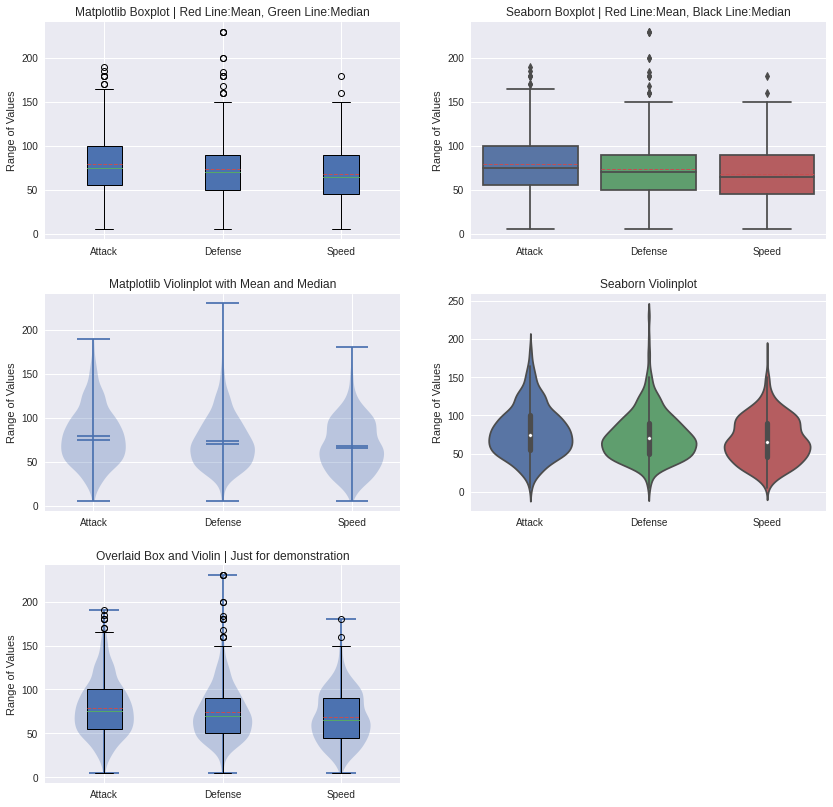

In [8]:
num_cols = ['Attack','Defense','Speed'] # numerical column names
num_df = df.loc[:,num_cols] # matplotlib uses lists or numpy array for multiple boxplots at once

#set Figure and axes
f,ax = plt.subplots(3,2,figsize=(14,14))
ax = ax.ravel()

# matplotlib box
ax[0].boxplot(num_df.values,labels=num_cols,patch_artist=True,showmeans=True,meanline=True)
ax[0].set_ylabel('Range of Values')
ax[0].set_title('Matplotlib Boxplot | Red Line:Mean, Green Line:Median')

# seaborn box
ax[1] = sns.boxplot(data=df[num_cols],showmeans=True,meanline=True,ax=ax[1])
ax[1].set_ylabel('Range of Values')
ax[1].set_title('Seaborn Boxplot | Red Line:Mean, Black Line:Median')

# matplotlib Violin
ax[2].violinplot(num_df.values,showmeans=True,showmedians=True)
ax[2].set_ylabel('Range of Values')
ax[2].set_xticks(np.arange(1, len(num_cols) + 1)) # set ticks on x-axis
ax[2].set_xticklabels(num_cols) # give the ticks labels as the column names
ax[2].set_title('Matplotlib Violinplot with Mean and Median')

# seaborn violin
ax[3] = sns.violinplot(data=df[num_cols],ax=ax[3])
ax[3].set_ylabel('Range of Values')
ax[3].set_title('Seaborn Violinplot')

# overlay first and third plots
ax[4].boxplot(num_df.values,labels=num_cols,patch_artist=True,showmeans=True,meanline=True)
ax[4].violinplot(num_df.values,showmeans=True,showmedians=True)
ax[4].set_ylabel('Range of Values')
ax[4].set_title('Overlaid Box and Violin | Just for demonstration')

f.delaxes(ax[-1])
plt.subplots_adjust(hspace=0.25)
plt.show()

There are Indeed outliers in all of the Attack,Defense and Speed mostly being in Defense. Violin plots are fat in the region where the density of values are maximun. That is, just like in our histogram, it shows that most of the Pokemons have attack values in between 50 and 100, Defense in the same range but has a broader range from almost 30 to 110.

## <font color='teal'>Categorical Plots </font>
These are the plots to show something inside data which is distributed into classes such as 0 or 1, Black or White etc.

### <font color='magenta'>Pie Charts</font>
Both Kinds of Pie and Bar Plots are used to show the distribution of the classes in the data. They work on counting the values in each of the classes. I'll be showing two differents each for Bar and Pie.

**PANDAS has it's own plotting Functionality. You can plot a datafame or a series using the `df[col_name].plot(kind='whatever kind of plot you like',args='All the valid arguments for that kind of plot in plt.kind())`**


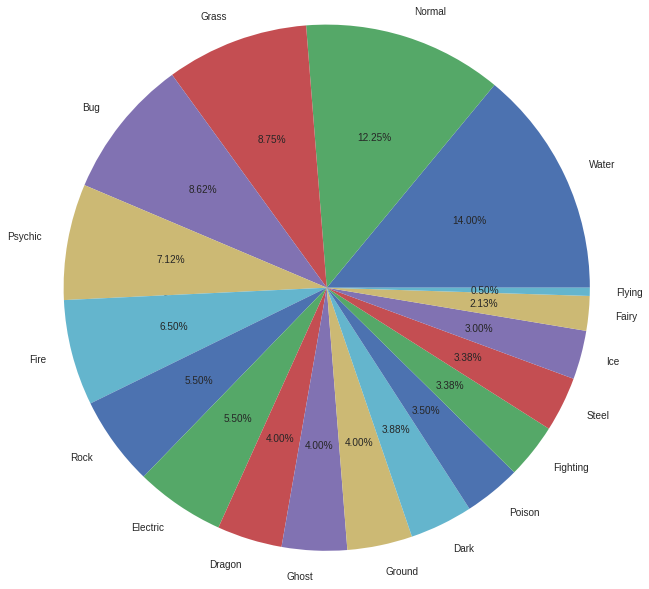

In [9]:
counted_unique_values = df['Type 1'].value_counts() # this returns a dataframe. Please check how it looks
counted_unique_values.plot(kind='pie',autopct='%.2f%%',radius=2.2) # use the Pandas plotting Function itself
# autopct tells us how to plot the % signs. Here 2 digits are used after decimal (float) and then a % sign
plt.show()

#Please Trye using 
# plt.pie(counted_unique_values,autopct='%1.2f%%',radius=2.2) # You'll find the same thing

### <font color='magenta'>Bar Graphs</font>

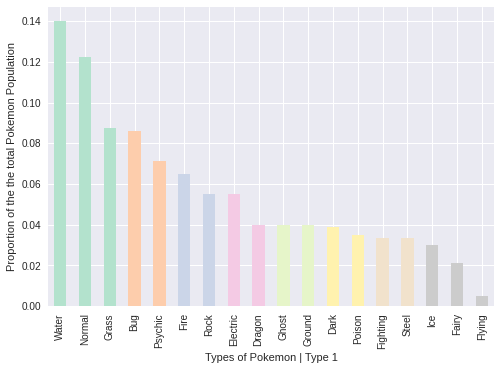

In [10]:
cmap = get_cmap(18,'Pastel2',return_cmap=False) # 18 different colors (list of RGBA tuples) from Pastel2 style

df['Type 1'].value_counts(normalize=True).plot(kind='bar',color=cmap)
plt.ylabel('Proportion of the the total Pokemon Population')
plt.xlabel('Types of Pokemon | Type 1')
plt.show()

As you can see, Pie and Bar charts show the same thing. Water Type Pokemons are the most making 14% of the total Population and the Least are Flying type which are almost 0% (0.5%)

# Multivariate Graphs
These Graphs can be seen as the Analysis of one more than one Variable at a time. They show the correlation, dependency, pattern among the variables. Such as Relation of Speed to Type 1 or correlation between Attack and Speed etc.

**There can be 4 Types of Graphs for that**
1. Numerical - Numerical Relation
2. Categorical - Categorical Relation
3. Categorical - Numerical
4. Mix of these 3 to have atleast 3 variables in one graph

### <font color='magenta'>Scatter Plots</font>
Shows the relationship among the two numerical attributes.

**<font color='green'> Given below is demonstration of Scatter Plots from simple to complex</font>**

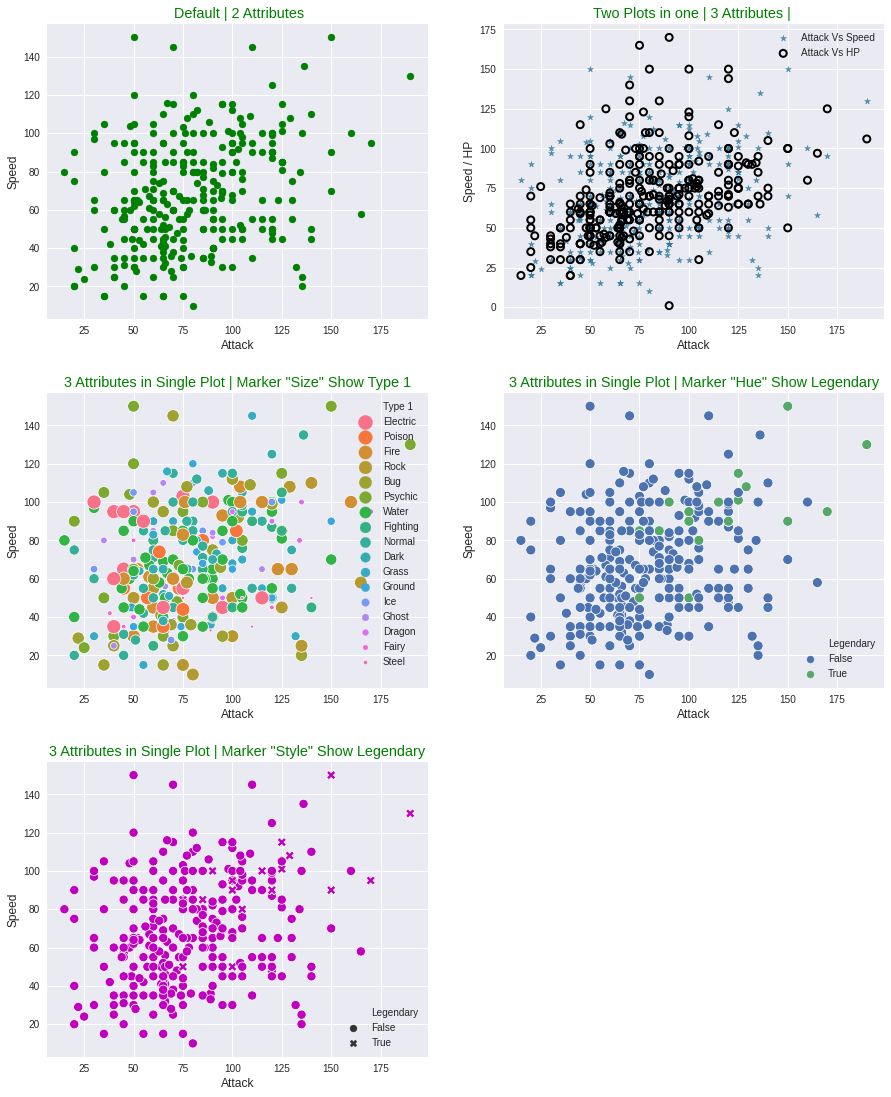

In [11]:
f,ax = plt.subplots(3,2,figsize=(15,19))
ax = ax.ravel()
sample = df.sample(300,random_state=SEED) # random 300 samples

# first plot. Simple single Plot
ax[0].scatter(x=sample['Attack'],y=sample['Speed'],facecolor='green')
ax[0].set_ylabel('Speed',size='large')
ax[0].set_xlabel('Attack',size='large')
ax[0].set_title(' Default | 2 Attributes',color='green',size='x-large')

# multiple scatter plots in one 
ax[1].scatter(x=sample['Attack'],y=sample['Speed'],s=40,facecolor=None,edgecolor='teal',marker='*',alpha=0.85,
            label='Attack Vs Speed') #  Teal colored Stars with less opacity and size=40

ax[1].scatter(x=sample['Attack'],y=sample['HP'],facecolor='none',edgecolor='black',linewidth=2,
            label='Attack Vs HP') # black hollow circles with thick boundry

ax[1].set_xlabel('Attack',size='large')
ax[1].set_ylabel('Speed / HP',size='large')
ax[1].set_title('Two Plots in one | 3 Attributes | ',color='green',size='x-large')
ax[1].legend()

# Three variables in single Plot. Size shows the Legendary of Pokemon
ax[2] = sns.scatterplot(x="Attack", y="Speed", size="Type 1",hue='Type 1',data=sample,ax=ax[2],sizes=(10, 200))
# change color of dots by using args of plt.scatter()
ax[2].set_xlabel('Attack',size='large')
ax[2].set_ylabel('Speed',size='large')
ax[2].set_title('3 Attributes in Single Plot | Marker "Size" Show Type 1',color='green',size='x-large')

# Three variables in single Plot. Size shows the Type 1 of Pokemon
ax[3] = sns.scatterplot(x="Attack", y="Speed", hue="Legendary",data=sample,ax=ax[3],s=100)
# s is the size of dots
ax[3].set_xlabel('Attack',size='large')
ax[3].set_ylabel('Speed',size='large')
ax[3].set_title('3 Attributes in Single Plot | Marker "Hue" Show Legendary',color='green',size='x-large')


# Three variables in single Plot. Marker shows the Legendary of Pokemon
ax[4] = sns.scatterplot(x="Attack", y="Speed", style="Legendary",data=sample,ax=ax[4],facecolor='m',s=85)
ax[4].set_xlabel('Attack',size='large')
ax[4].set_ylabel('Speed',size='large')
ax[4].set_title('3 Attributes in Single Plot | Marker "Style" Show Legendary',color='green',size='x-large')

f.delaxes(ax[-1])
plt.subplots_adjust(hspace=0.25)

plt.show()

**How to read Plots??**

What we can see from `Plot 1 and 2` is that Pokemons with High Attack tend to have Higher values of Speed and Attack and Hp has the same relation.

`Plot 4 and 5` tells us that Pokemon with Legendary category, all have High Speed and High Attack

<font color='red'>Note: I have deliberately used `hue=Type 1` and `size=Type 1` so that same size attributes have same color because it could have been ambiguous. You should not use size for classes with many bins as you might not be able to see the difference in sizes from your eyes</font>
      
` Plot 3` shows us that **Elcetric** pokemons have High speed but Less Power as you can see the Biggest dots in the region of 100-140 Speed and 25-125 attack. `Steel` Pokemons have High Attack but low speed as seen by the smallest of dots. `Normal` Pokemons are indeed normal as their stats lie in the middle of the chart.

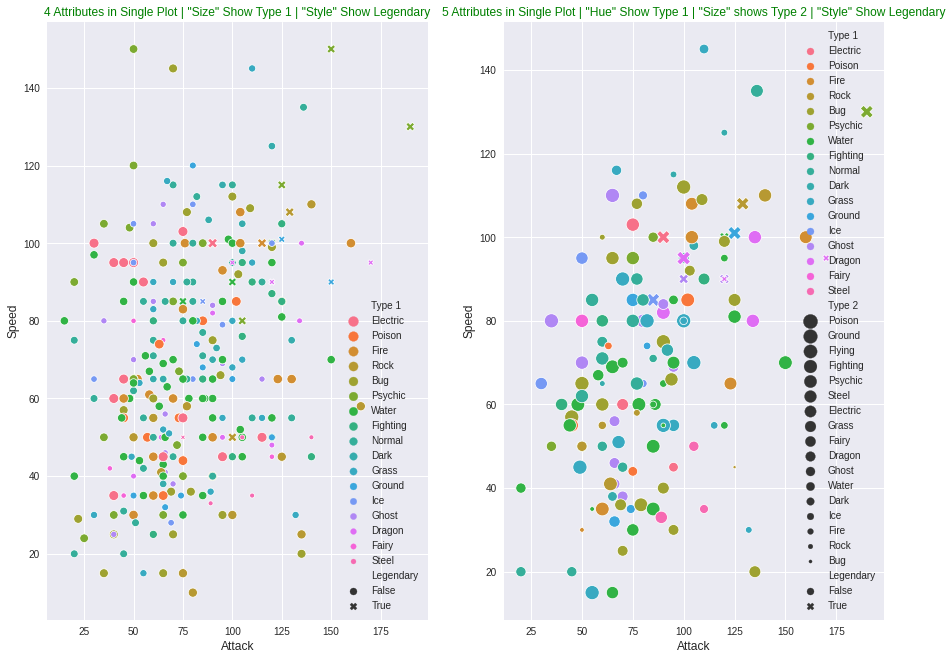

In [12]:
f,ax = plt.subplots(1,2,figsize=(15,11))
ax = ax.ravel()

# Four variables in single Plot. Size shows the Legendary of Pokemon and Hue  shows  Type 1
ax[0] = sns.scatterplot(x="Attack", y="Speed", size="Type 1",hue='Type 1',style='Legendary',data=sample,ax=ax[0])
ax[0].set_xlabel('Attack',size='large')
ax[0].set_ylabel('Speed',size='large')
ax[0].set_title('4 Attributes in Single Plot | "Size" Show Type 1 | "Style" Show Legendary',
                color='green',size='large')


# Five variables in single Plot. Size shows the Legendary of Pokemon, Hue  shows  Type 1 Size Shows Type 2
ax[1] = sns.scatterplot(x="Attack", y="Speed",size='Type 2',sizes=(10, 200), hue="Type 1",style='Legendary',
                        data=sample,ax=ax[1])
ax[1].set_xlabel('Attack',size='large')
ax[1].set_ylabel('Speed',size='large')
ax[1].set_title('5 Attributes in Single Plot | "Hue" Show Type 1 | "Size" shows Type 2 | "Style" Show Legendary',
                color='green',size='large')

plt.show()

### <font color='magenta'>Regression Plots</font>
Regression Plots are used to confirm the relation of two numerical attributes (what we see in scatter plots) by fitting a regression line. Regression tells us that what is the pattern of the the two variable and is seen by `r square {-1,1}` which is nothing but a number defining ho two numerical are related to each other. 

1. If two attributes have `r square` value of  -1, it means that there is huge relation and if one attribute is inreasing, other one is decreasing. ``.
2. If the value is 1, it means there is positive perfect relation and two variables increase by the same proportion simultaneously. `
3. 0 score means there is no pattern  and relation at all. Such as `Milage of a Car` and `Brightness of a star`.

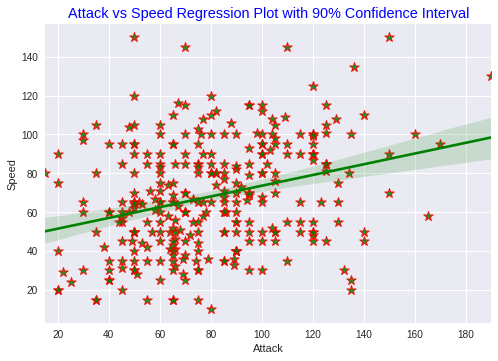

In [13]:
# plt.scatter() and plt.line() arguments can be passed here
scatter_kws = {'edgecolor':'red','s':100,'alpha':0.85,'linewidth':1}
sns.regplot(x='Attack', y='Speed', data=sample, ci=90, color='green',marker='*',scatter_kws=scatter_kws)
plt.title('Attack vs Speed Regression Plot with 90% Confidence Interval',size='x-large',color='blue')
plt.show()

### <font color='magenta'>Joint Plot</font>
There are just Like Regression plot buth with the Probability Distribution of the two attributes.

**You can choose to pass of the different `kind = “scatter” | “reg” | “resid” | “kde” | “hex”`**

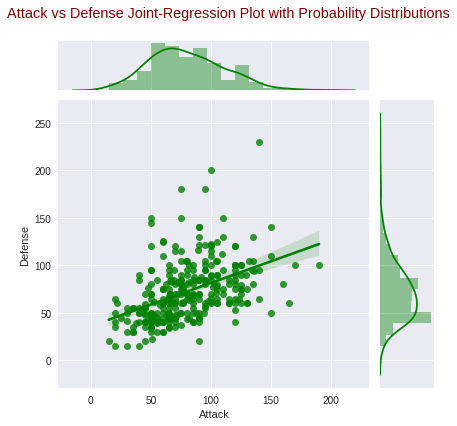

In [14]:
j = sns.jointplot('Attack','Defense',data=sample,color='green',kind='reg')

plt.subplots_adjust(top=0.9) # there are 3 subplots so to adjust the title
j.fig.suptitle('Attack vs Defense Joint-Regression Plot with Probability Distributions',size='x-large',
               color='maroon')
plt.show()

There is a Straight line in between the X and Y axis. It could have been a perfect relation if the same line was through the origin too. In our case, Attack and Defense are increasing together. People with High Attack tend to have High Defense too.

### <font color='magenta'>Count Plot, BiVariate Box Plots</font>
Used to see the Class vs Class Distribution

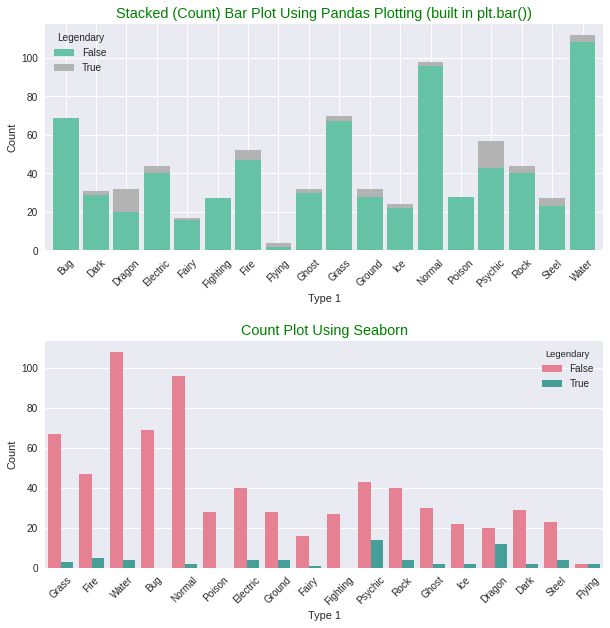

In [15]:
f,axs = plt.subplots(2,1,figsize=(10,10))

axs[0] = pd.crosstab(df['Type 1'],df['Legendary']).plot(kind='bar',width=0.85,ax=axs[0],cmap='Set2',
                                                        stacked=True)
axs[0].set_title('Stacked (Count) Bar Plot Using Pandas Plotting (built in plt.bar())',color='green',
                 size='x-large')

axs[1] = sns.countplot(x="Type 1", hue="Legendary", data=df,ax=axs[1],palette='husl')
axs[1].set_title('Count Plot Using Seaborn',color='green',size='x-large')

for ax in axs: # set tick labels and Y labels for both of the sublots at once
    plt.setp(ax.get_xticklabels(), rotation=45)
    ax.set_ylabel('Count')

plt.subplots_adjust(hspace=.4)
plt.show()


No `Bug, Fighting, Poision` Types of Pokemons are Legendary. 
Even though there are less number of `Flying` Pokemons, still the ratio of Legendary to Normal is around 1.

`Dragon` Type Pokemons have second Legendary to Non-Legendary ratio.

Most Nubmers of Legendary Pokemons belong to `Psychic` category though the ratio is less than `Dragon` and `Flying`.

### <font color='magenta'>Box, Violin (BiVariate)</font>
When we want to see the distribution of Numerical values and their characteristics in each class, we use Box and Violin with a Class.

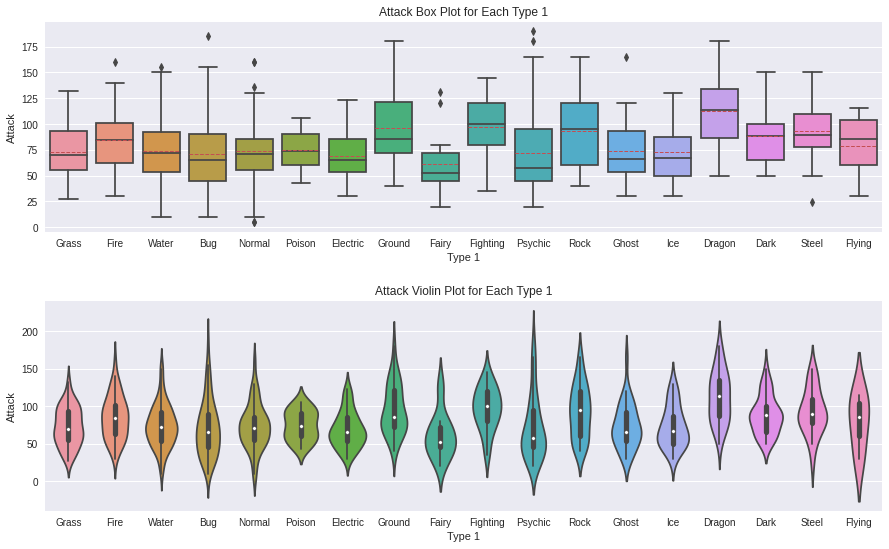

In [16]:
f,ax = plt.subplots(2,1,figsize=(15,9))
ax = ax.ravel()

ax[0] = sns.boxplot(x="Type 1", y="Attack", data=df,ax=ax[0],dodge=True,meanline=True,showmeans=True)
ax[0].set_title('Attack Box Plot for Each Type 1')

ax[1] = sns.violinplot(x="Type 1", y="Attack", data=df,ax=ax[1],dodge=True)
ax[1].set_title('Attack Violin Plot for Each Type 1')

plt.subplots_adjust(hspace=.33)
plt.show()

We can Observe from the `Box Plot` that data is Left or Neagatively Skewed for `Fighting, Rock and Flying` because Mean (Red Dotted Line) is less than the Median (Black Solid).

Out of all the Outliers present in Attack, only `Steel and Normal` Pokemons have outliers on the least end i.e values less than the (1.5*Q1). Because of the abnormal outliers in the `Fairy`, it has pulled the mean towards outliers.

`Water and Dragon` have almost perfectly nomal distribution and can be seen with both Box as well as Violin Plots.

Out of all the Types of Pokemons, `Dragon` type of Pokemons have the highest Average and Range of Attack.

### <font color='magenta'>Dist, Hist Plots Plots (For BiVariate Analysis)</font>
Distribution of Numerical attributes in each class can be easily seen through these kind of plots.

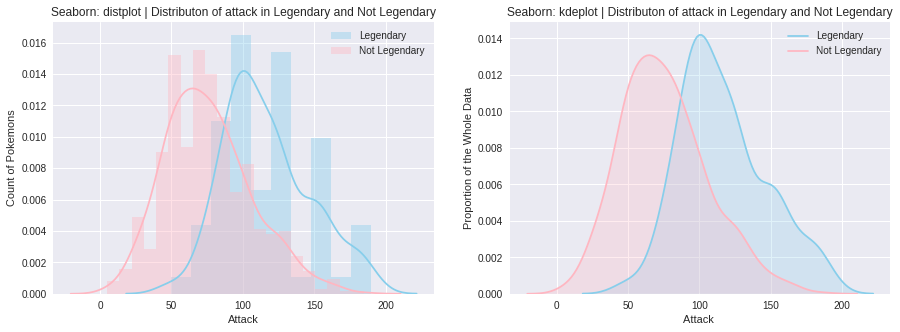

In [17]:
f,ax = plt.subplots(1,2,figsize=(15,5))


ax[0] = sns.distplot(df[df['Legendary'] == True]['Attack'],kde=True,ax=ax[0],color="#87ceeb",
                    label='Legendary')
ax[0] = sns.distplot(df[df['Legendary'] == False]['Attack'],kde=True,ax=ax[0],color="#FFB6C1",
                    label='Not Legendary')
ax[0].set_ylabel('Count of Pokemons')
ax[0].set_title('Seaborn: distplot | Distributon of attack in Legendary and Not Legendary')
ax[0].legend()

# seaborn's kdeplot
ax[1] = sns.kdeplot(df[df['Legendary'] == True]['Attack'], shade=True, color="#87ceeb",ax=ax[1], label='Legendary')
ax[1] = sns.kdeplot(df[df['Legendary'] == False]['Attack'], shade=True, color="#FFB6C1",ax=ax[1],label='Not Legendary')
ax[1].set_ylabel('Proportion of the Whole Data')
ax[1].set_xlabel('Attack ')
ax[1].set_title('Seaborn: kdeplot | Distributon of attack in Legendary and Not Legendary')

plt.show()

It shows that Most of the Pokemons (Mode or the Peak) who are Legendary, tend to have a Attack Values of 90-120  and High Range of Attack from 30-200 but Simple Pokemons tend to have Lower Attack Range from 1-150 and most of those have Attack of 30-70.

### <font color='magenta'>Strip, Swarm Plots</font>
These plots are used when **one of the attribute is categorical and one is numerical** and we tells us about the distribution of the numerical attribute among the classes.

**To get the better understanding of both the plots, we will use overlapping of violin and box plots too so that we can fully understand brtter**

**<font color='red'>In Strip plot, the jitter can be from 0 to 1 but it is just random spray of values and is NOT is a correct approximation of distribution</font>**

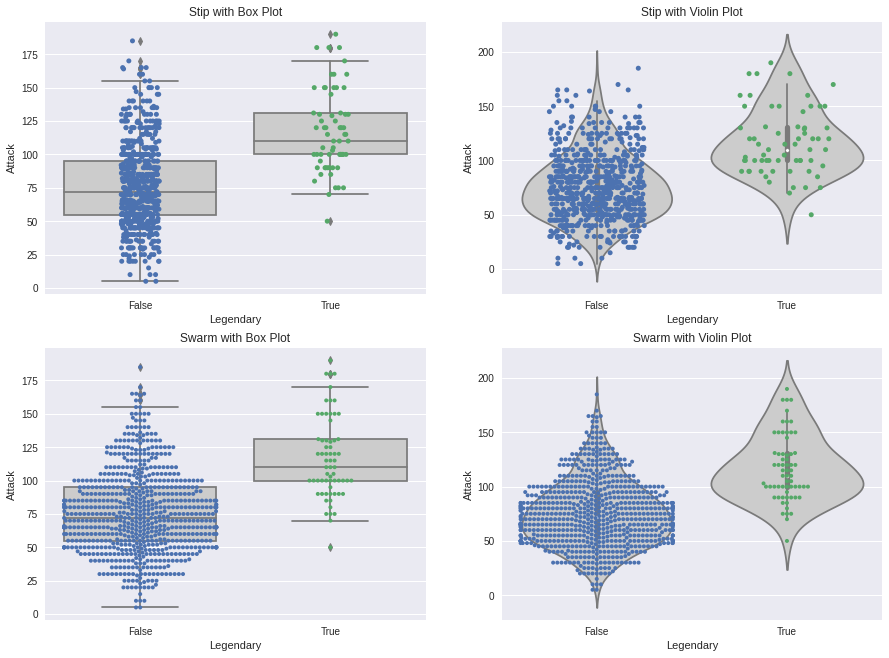

In [18]:
f,ax = plt.subplots(2,2,figsize=(15,11))
ax = ax.ravel()

ax[0] = sns.boxplot(x="Legendary", y="Attack", data=df,ax=ax[0],color='0.8')
ax[0] = sns.stripplot(x="Legendary", y="Attack", data=df,ax = ax[0],jitter=True)
ax[0].set_title('Stip with Box Plot')

ax[1] = sns.violinplot(x="Legendary", y="Attack", data=df,ax=ax[1],color='0.8')
ax[1] = sns.stripplot(x="Legendary", y="Attack", data=df,ax = ax[1],jitter=0.25)
ax[1].set_title('Stip with Violin Plot')

ax[2] = sns.boxplot(x="Legendary", y="Attack", data=df,ax=ax[2],color='0.8')
ax[2] = sns.swarmplot(x="Legendary", y="Attack", data=df,ax = ax[2],size=4)
ax[2].set_title('Swarm with Box Plot')

ax[3] = sns.violinplot(x="Legendary", y="Attack", data=df,ax=ax[3],color='0.8')
ax[3] = sns.swarmplot(x="Legendary", y="Attack", data=df,ax = ax[3],size=4)
ax[3].set_title('Swarm with Violin Plot')

plt.show()

MAny of the General Type Pokemons have are having Attack of 40-900 and that is why we have a fat shae in the middle of the Violin Plot. Many Legendary Type Pokemons also have Attack range of 100.

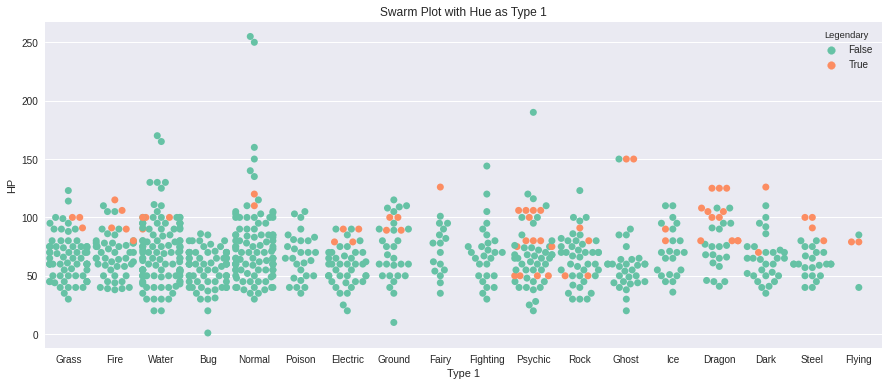

In [19]:
fig = plt.figure(figsize=(15,6))

plt.title('Swarm Plot with Hue as Type 1')
sns.swarmplot(x="Type 1", y="HP", hue='Legendary', data=df,size=7,palette='Set2')
plt.show()

`Dragon` and `Psychic` Pokemons have many Legendary Pokemons belonging to them. Ratio is 1 for `Flying`.
There are almost no Pokemons in the lower range of HP. All the Pokemons who ae Legendary, tend to have a HP of more than 70 except a few with just over 50.

### <font color='magenta'>Point Plot</font>
Following is from Seaborn's Demo about Point Plot:

A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars.

Point plots can be more useful than bar plots for focusing comparisons between different levels of one or more categorical variables. They are particularly adept at showing interactions: how the relationship between levels of one categorical variable changes across levels of a second categorical variable. The lines that join each point from the same hue level allow interactions to be judged by differences in slope, which is easier for the eyes than comparing the heights of several groups of points or bars.

In [20]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


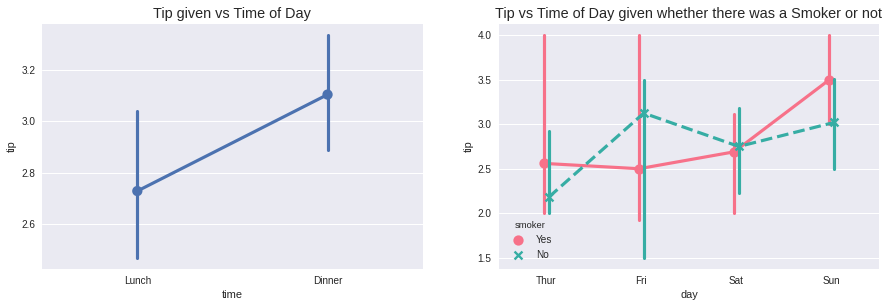

In [21]:
f,ax = plt.subplots(1,2,figsize=(15,4.5))

ax[0] = sns.pointplot(x="time", y="tip", data=tips,ax=ax[0]) # default mean with 95% confidence interval
ax[0].set_title('Tip given vs Time of Day',size='x-large')

ax[1] = sns.pointplot(x="day", y="tip", hue="smoker",data=tips,estimator=np.median,ci=99,dodge=True,
                   markers=["o", "x"],linestyles=["-", "--"],palette='husl',ax=ax[1],seed=SEED)
# dodge is to seperate the two so that they do not overlab
ax[1].set_title('Tip vs Time of Day given whether there was a Smoker or not',size='x-large')

plt.show()

There are more tips given on an average during Dinner than Lunch.

Amount of Tips given by Smokers increases from Friday to Sunday and on Sunday they give more tips than non smokers on Sundays. Tips given by non-smokers increaes from Thursday to Friday but decreases from Friday to Sunday with high error in between (length of bar on Friday that too on the negative end).

## <font color='teal'>Advanced Plots </font>
These are some advanced plots and **can not be used with matplotli subplots axis as they create their own axes**. These plots can do some or all of the plots shown above in a single plot.

### <font color='magenta'>Pair Plot</font>
Pair Plot shows the relation of each and every variable to each and every other variable in the daframe for **NUMERICAL** data only. If you have categories, use them with `LabelEncoding`.

In [22]:
label_df = df.drop(['Type 1','Type 2','Name','Generation',],axis=1)
label_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,318,45,49,49,65,65,45,False
1,405,60,62,63,80,80,60,False
2,525,80,82,83,100,100,80,False
3,625,80,100,123,122,120,80,False
4,309,39,52,43,60,50,65,False


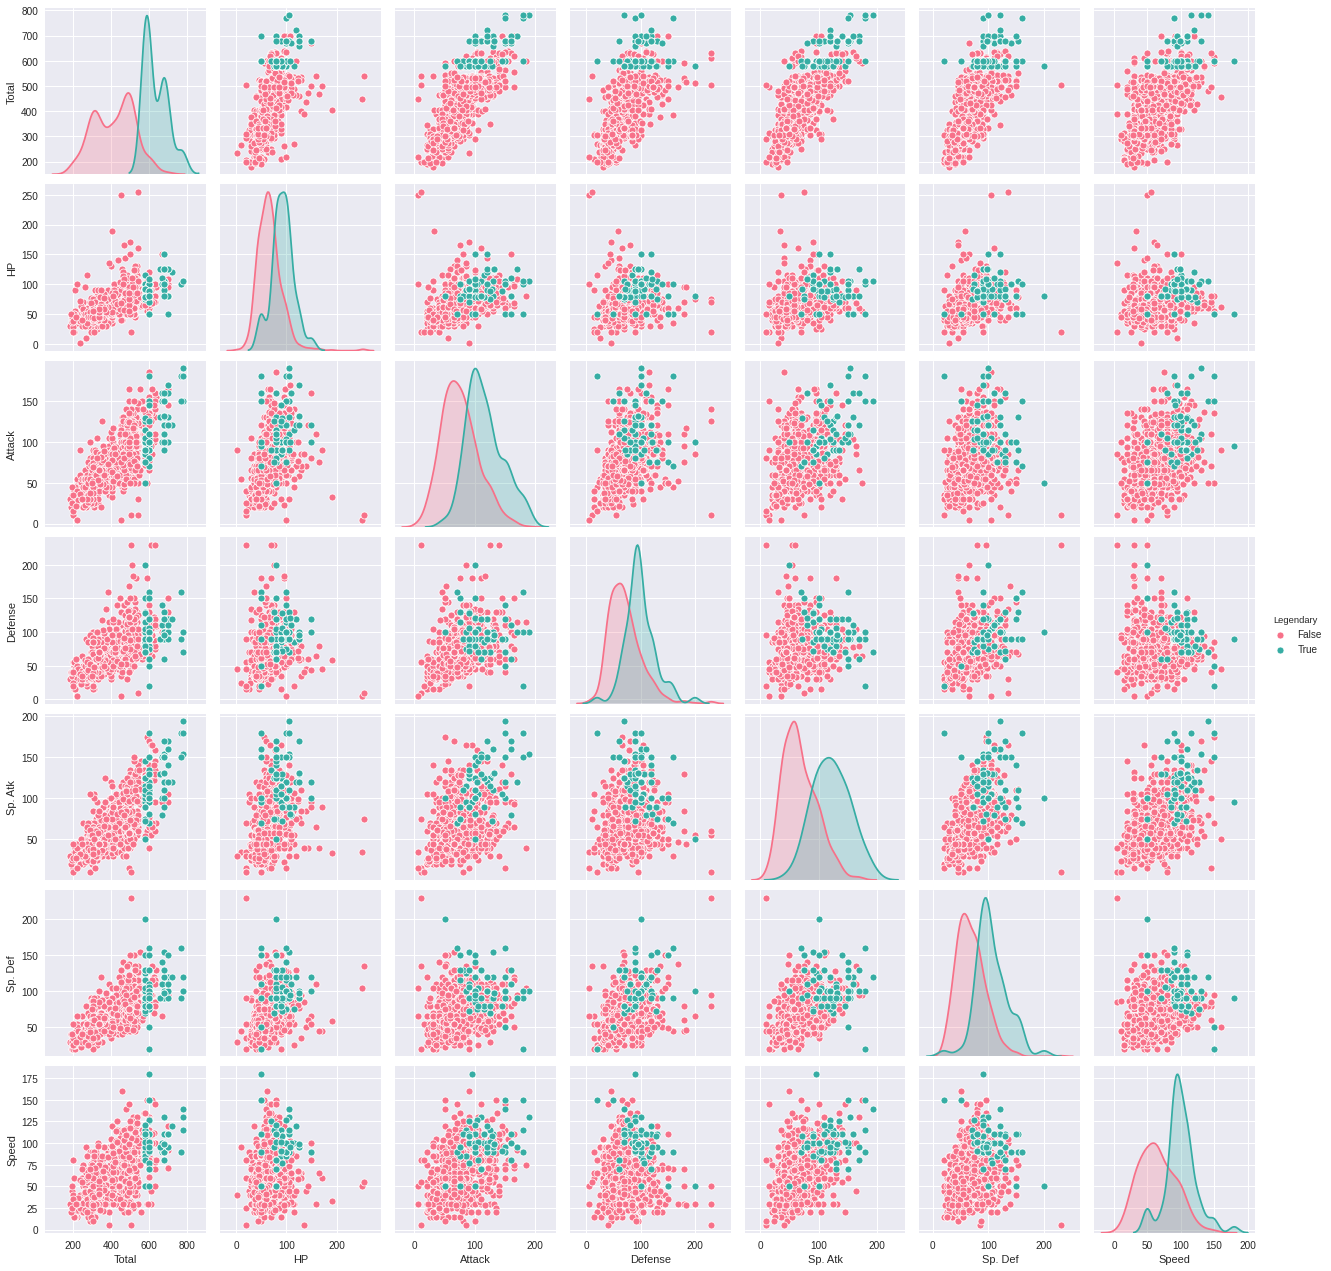

In [23]:
sns.pairplot(label_df.dropna(),kind='scatter',diag_kind='kde',hue='Legendary',palette='husl')
# plot reression plot for every numerical attribute with 'kde' plot for diagonals where the class separation is
# according to Legendary

plt.show()
# you should most probabily save the figure if it not feasible to show

### <font color='magenta'>Relational Plot</font>
`relplot` can show relation between 2 numerical attributes separated by a maximum of 4 extra categorical attributes.

It can plot ` “scatter, line”`

**<font color='red'>Note: Number of rows, columns and size of chart is dependent on the number of classes and how many attributes you want to show. It can show relation between a maximum of 2 `numerical` attributes and a total of 6 attributes.</font>**

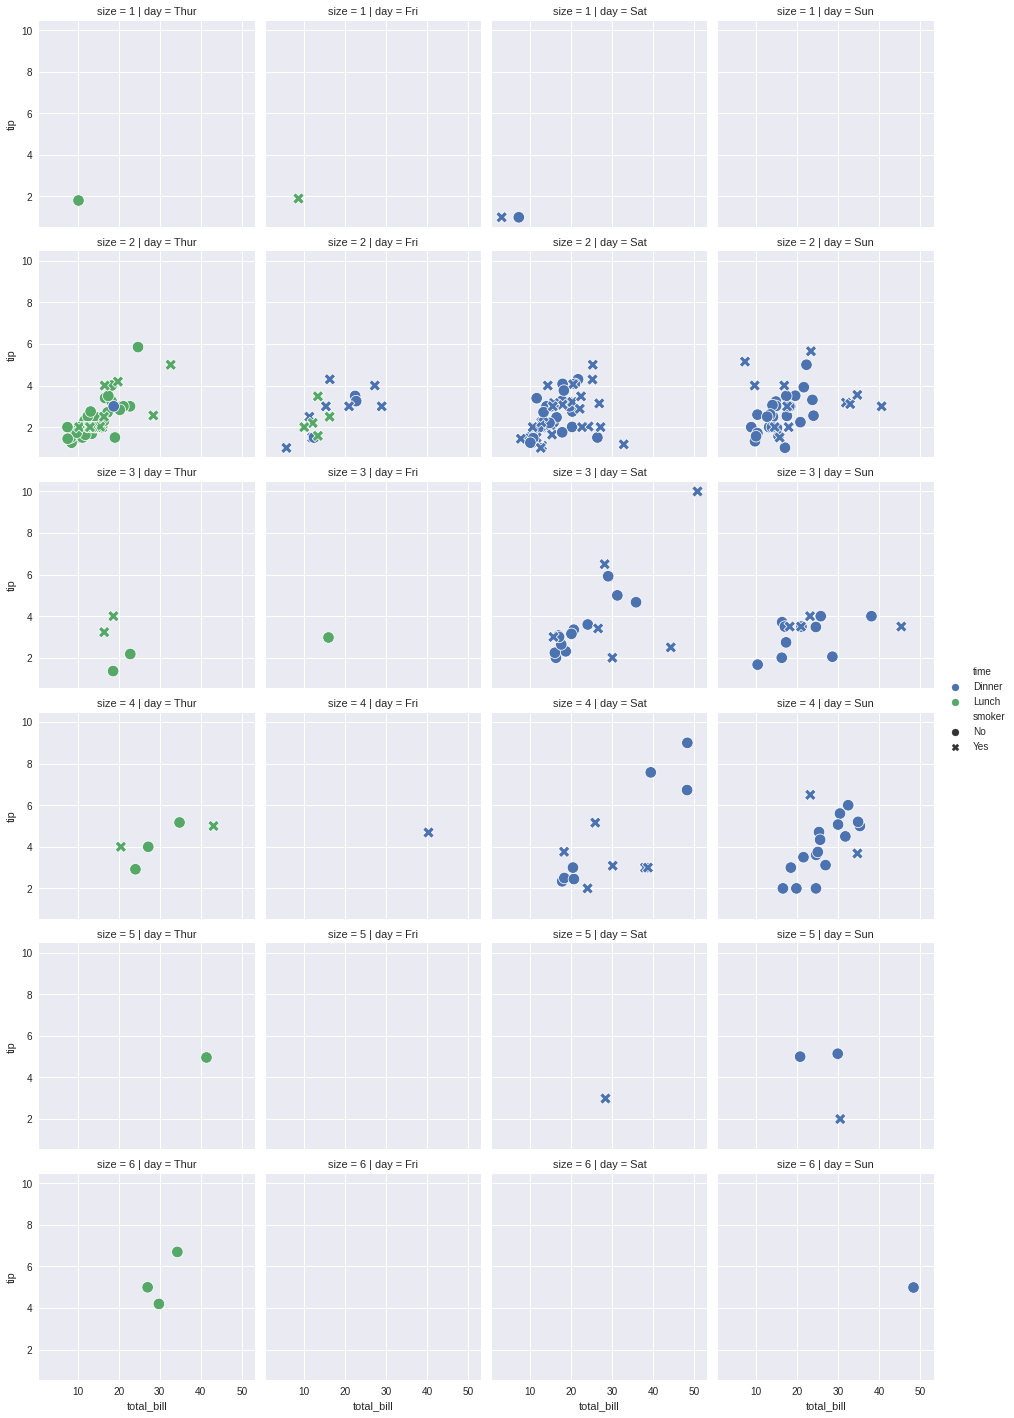

In [24]:
sns.relplot(x="total_bill", y="tip",row='size',col="day", hue="time", style="smoker",kind="scatter", data=tips,
           height=3.3, aspect=1,s=133)
# you can put the respective matplotlib args for the respective 'kind'
plt.show()

To know what the chart means, just look at the `2nd row,2nd column` chart. This chart says that:

1. **On `Fridays`, the `tip` and `total_bill` both increases simulteneously and most `tips` and `total_bill` is given by the people who are `smoker` and come in a group `size=2`.** (`blue`-`crosses` in the upper right sides)

2. **People who are `smoker` and come in a `size` of 2 for lunch `time` do not give as much `tip` and `total_bill`** (`green-crosses`)

3. **There are very few `non smoking` people on Friday for dinner `time`, who come in a `size` of 2**. (`blue-circle`)
4. **There no people who are `non smoker` and come for lunch `time` in a `size` of 2 on Fridays**.(`abscence of green-circle`)

_____________________________________________________________________

**On Thursdays,(`day=thursday`) couples (`size=2`) tend to have luch (`time='lunch`) instead of dinner and pay good tips relative to bills.** (second row, first column: all `green`)

----------------------------------------------------------------------

**Irrespective of the size and smoking, people want to have lunch instead od dinner on thursdays** (first row all green, no blue)

____________________________________________________________________

**Everyone wants to have Dinner instead of lunch on Saturdays and Sundays irrespective of the Size and Smoking habits** (all blue no green in the last 2 columns)

### <font color='magenta'>Categorical Plot</font>
`catplot` is just like `relplot` but with more focus on displaying categorical attributes.

It can plot ` “point”, “bar”, “strip”, “swarm”, “box”, “violin”, or “boxen”`

**<font color='red'>Note: It can also address 5 different attributes but includes only one numerical attribute</font>**

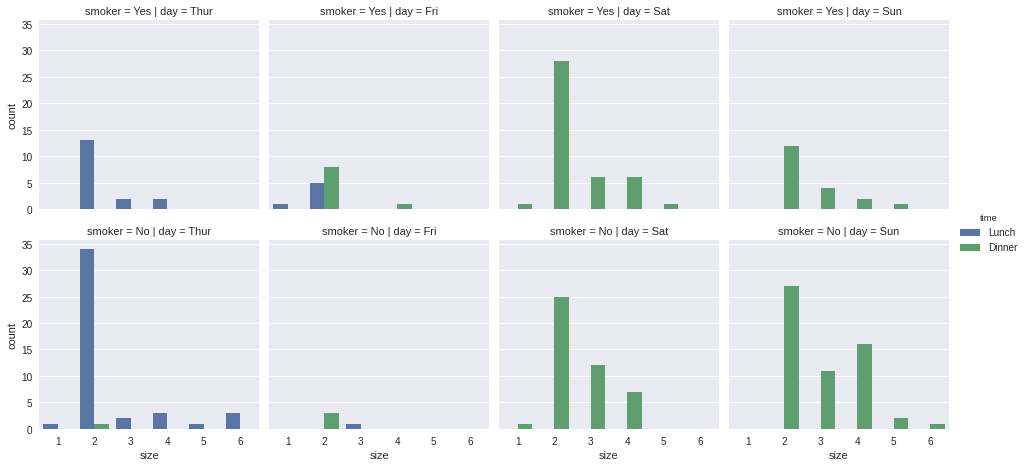

In [25]:
# pass one of either X or Y in count plot 
sns.catplot(x="size",row='smoker',col="day", hue="time",kind="count", data=tips,height=3.3)
plt.show()

**Some Interpretations:**

1. Almost No one (except very few couples) wants to have Dinner on thursdays and literally every one wants to have lunches on Saturdays and Sundays. (First Column all blue, last 2 columns all Green)

_____________________________________________________________________________________________________

2. People do not go out much of Fridays except some couples and and groups of 3 (second column). Non smoker couples tend to go for dinner only and non smoker group of 3 go for lunch (2nd row second column)

_______________________________________________________________________________________________

3. Non smoking couples tend to go for a lunch on thursdays far more than the couples who smoke. (difference between 1st and second row of 1st column)

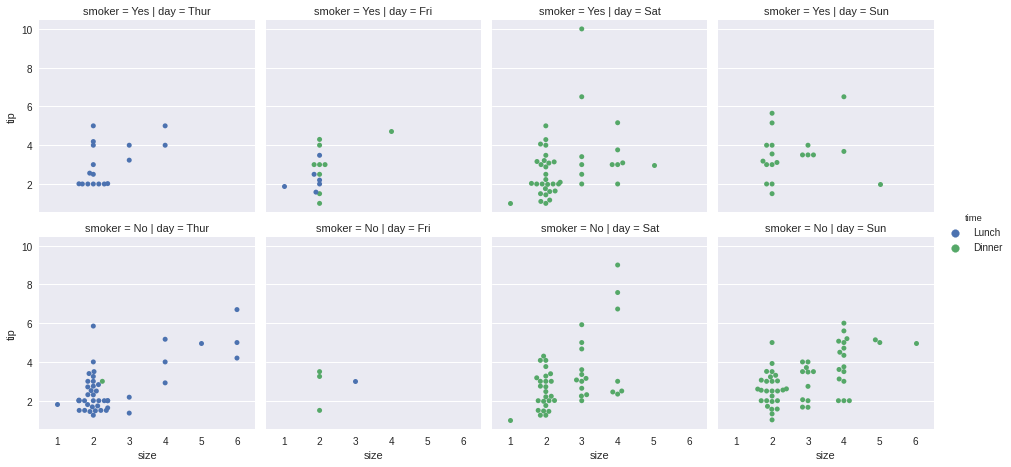

In [26]:
sns.catplot(y='tip', x="size",row='smoker',col="day", hue="time",kind="swarm",data=tips,height=3.3)
plt.show()

# Thank You!!!
For giving your time to this notebook and please do suggest any correction.
If you want to learn more about Image Processing, Deep Learning, Keras or PyTorch, please check my other Notebooks.